<a href="https://colab.research.google.com/github/Jonida-Zekaj/EMNIST-Image_Classifier/blob/main/NiryoRobot_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

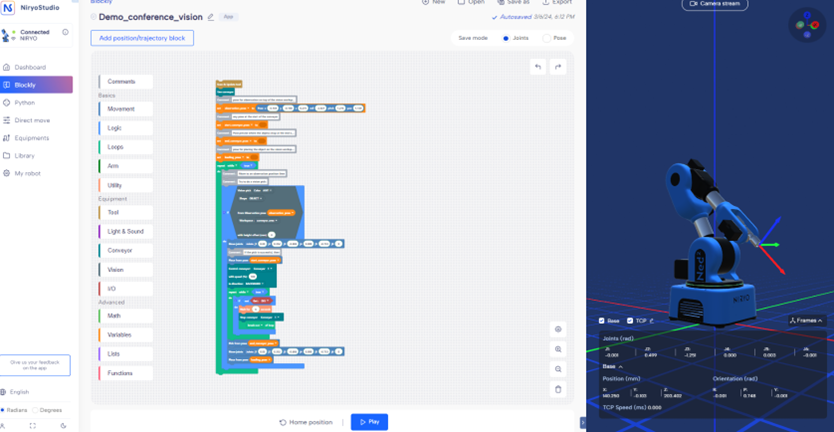

#**1) UTILITIES**


*CODE TEMPLATE*

In [ ]:
# !/usr/bin/env python3                  #1

from pyniryo import *                    #2
import time                              #3

robot = NiryoRobot("Robot_IP")    #4

robot.calibrate_auto()                   #5
robot.update_tool()                      #6


# Write Code Here


robot.close_connection()                 #7


**1** : hashbang (previously introduced concept)

**2** : command that imports all classes and functions from the pyniryo library, which is designed specifically for Niryo robots.

**3** : command that imports Python module that provides functions that manage time (e.g. track/specify the duration of an operation).

**4** : a class instance of the Niryo robot that connects to the specified robot through the input IP address.
For this command to work it is crucial to input the correct IP address of the robot arm in use.
1.	Open Niryo Studio
2.	Navigate to connections
3.	Copy the displayed IP address *Robot_IP*
**5** : command which automatically calibrates the robot.

**6** : ensure that the robot is updated about the current tool (gripper) attached to its end effector.

**7** : connection (communication) between the computer and the robot is properly closed.


\\

*JOINT AND POSE READ*

In [ ]:
# !/usr/bin/env python3

from pyniryo import *
import time

robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()

# Getting Joints with function
joints_read = robot.get_joints()
print("These are the coordinates for the JOINTS")
print(joints_read)
# Getting Joints with function
pose_read = robot.get_pose()
print("These are the  coordinates for the POSE")
print(pose_read)

robot.close_connection()

This script connects to the Niryo robot using its IP address, calibrates it, and updates the attached tool. It then fetches the robot's joint positions and the current pose and prints them.

E.g.

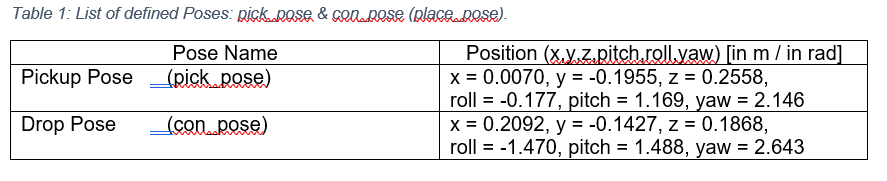

#**2) ROBOT MOVEMENT CONTROL**

*JOINT MOVEMENT (VARIABLES)*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time

robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()
j1=-0.0007288597570993538
j2= 0.49940895727663126
j3=-1.2506181983468665
j4= 9.265358979293481e-05
j5= 0.002975307985978226
j6= -0.0014413271980928677


robot.move_joints([j1,j2,j3,j4,j5,j6])


robot.close_connection()


The Niryo robot to a specific joint configuration by specifying the joint **(j1 - j6)** angles for each of the six robot joints.


*JOINT MOVEMENT (DIRECT VALUES)*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time

robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()


robot.move_joints([-0.0007288597570993538, 0.49940895727663126, -1.2506181983468665, 9.265358979293481e-05, 0.002975307985978226, -0.0014413271980928677])


robot.close_connection()


*CARTESIAN MOVEMENT*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time

robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()
x = 0.1403
y = -0.0001
z = 0.2035
roll = 0.000
pitch = 0.747
yaw = -0.001

robot.move_pose(x, y,z,roll,pitch,yaw)


robot.close_connection()


Moves end-effector to specified (x,y,z) position with orientation (roll,pitch,yaw).

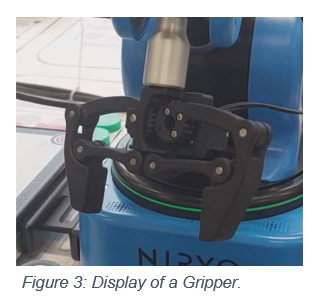



*POSEOBJECT MOVEMENT*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time

robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()


pick_pose = PoseObject(
x = 0.2267, y = 0.2220, z = 0.3756,
roll = 2.587, pitch = 0.438, yaw = 0.793
)



first_place_pose = PoseObject(
x = 0.2734, y = -0.1253, z = 0.3932,
roll = 2.793, pitch = 0.372, yaw = -0.354
)
robot.move_pose(pick_pose)
robot.move_pose(first_place_pose)


robot.close_connection()


#**3) PICK AND PLACE TASKS**

*FIRST PICK AND PLACE*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time

robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()





robot.grasp_with_tool()
time.sleep(2)


robot.release_with_tool()


print("Hello Intro to Robotics")



robot.close_connection()


This script simulates a basic pick and place task where the robot grips an object, holds it for a moment (2 seconds), then releases the object. Afterward, it prints a message and closes the connection.

*ADVANCED PICK AND PLACE*

In [ ]:
# !/usr/bin/env python3

from pyniryo import *
import time
robot = NiryoRobot("Robot_IP")
workspace_name = "vision"
robot.calibrate_auto()
robot.update_tool()
conveyor_id=robot.set_conveyor()

pick_pose = PoseObject(
x = 0.0070, y = -0.1955, z = 0.2558,
roll = -0.177, pitch = 1.169, yaw = 2.146
)
place_pose = PoseObject(
x = 0.2092, y = -0.1427, z = 0.1868,
roll = -1.470, pitch = 1.488, yaw = 2.643
)
robot.move_pose(pick_pose)
obj_found, pos_array, shape, color = robot.detect_object(workspace_name,
                                                         shape=ObjectShape.CIRCLE,
                                                         color=ObjectColor.ANY)
while obj_found:
    print("Circle Object Found!")
    obj_found, shape, color = robot.vision_pick(workspace_name,height_offset=0.02,
                                                shape=ObjectShape.CIRCLE,
                                                color=ObjectColor.ANY)
    robot.place_from_pose(place_pose)
    robot.run_conveyor(conveyor_id, speed=20, direction=ConveyorDirection.FORWARD)
    time.sleep(2)
    robot.stop_conveyor(conveyor_id)

print("Circle Object NOT Found!")


robot.close_connection()


This program performs an advanced pick-and-place task using visual detection. The robot moves to a specified pick pose, detects an object of a given shape and color, picks it up, and then moves to a place pose to drop the object. The robot stops once no object is detected.

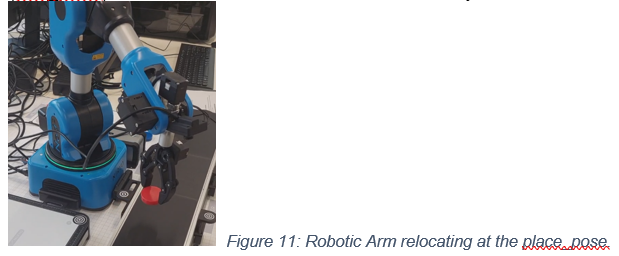

#**4) VISION-BASED TASKS**

*OBJECT DETECTION*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time
workspace_name = "vision"
robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()
pick_pose = PoseObject(
x = 0.0070, y = -0.1955, z = 0.2558,
roll = -0.177, pitch = 1.169, yaw = 2.146
)
robot.move_pose(pick_pose)

shape_expected = ObjectShape.CIRCLE
color_expected = ObjectColor.RED

obj_found, pos_array, shape, color = robot.detect_object(workspace_name,
                                                         shape=shape_expected,
                                                         color=color_expected)
if obj_found:
    print("Colour of Item : ",color)
    print("Shape of Item : ", shape)


if not obj_found:
    print("Object was NOT found !")

robot.close_connection()


The workspaces is scaned using the camera input to detect an item of specific shape =**Circle** and color=**Red**. If the specified object is found, its shape and color are printed. If not, a message indicating that no object was found is printed.

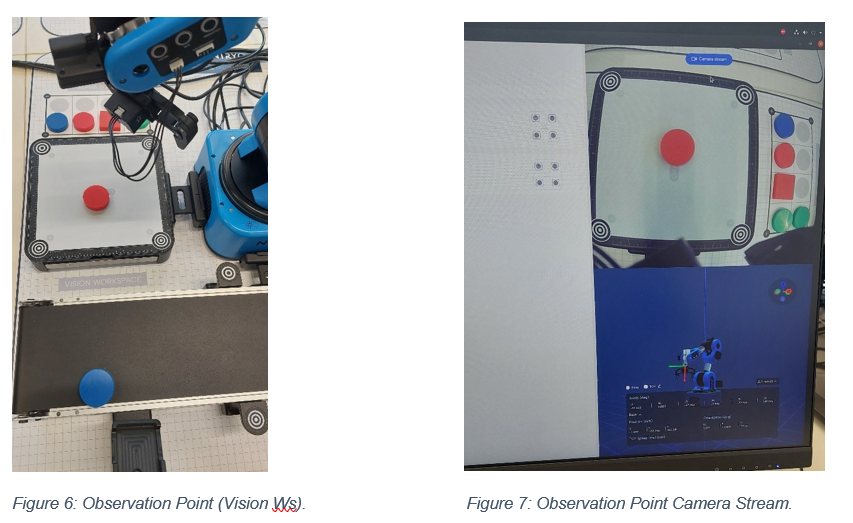

*OBJECT DETECTION AND PICK-UP*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time
workspace_name = "vision"
robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()
pick_pose = PoseObject(
x = 0.0070, y = -0.1955, z = 0.2558,
roll = -0.177, pitch = 1.169, yaw = 2.146
)
robot.move_pose(pick_pose)

shape_expected = ObjectShape.CIRCLE
color_expected = ObjectColor.RED

obj_found, pos_array, shape, color = robot.detect_object(workspace_name,
                                                         shape=shape_expected,
                                                         color=color_expected)
if obj_found:
    print("Colour of Item : ",color)
    print("Shape of Item : ", shape)
    obj_found, shape, color = robot.vision_pick(workspace_name,
                                                shape=shape_expected,
                                                color=color_expected)


if not obj_found:
    print("Object was NOT found !")

robot.close_connection()


An extended version of the previous script, with the addition of:

"if the searched for object is detected in the scanned space, besides printing the confirmation message that object will be picked-up through the end effector (e.g. gripper).

*OBJECT DETECTION AND DISPLACEMENT TO THE CONVEYOR BELT*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time
workspace_name = "vision"
robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()
pick_pose = PoseObject(
x = 0.0070, y = -0.1955, z = 0.2558,
roll = -0.177, pitch = 1.169, yaw = 2.146
)
con_pose = PoseObject(
x = 0.2092, y = -0.1427, z = 0.1868,
roll = -1.470, pitch = 1.488, yaw = 2.643
)
robot.move_pose(pick_pose)

shape_expected = ObjectShape.CIRCLE
color_expected = ObjectColor.RED
conveyor_id=robot.set_conveyor()
robot.stop_conveyor(conveyor_id)
obj_found, pos_array, shape, color = robot.detect_object(workspace_name,
                                                         shape=shape_expected,
                                                         color=color_expected)
if obj_found:
    print("Colour of Item : ",color)
    print("Shape of Item : ", shape)
    obj_found, shape, color = robot.vision_pick(workspace_name,
                                                shape=shape_expected,
                                                color=color_expected)
    robot.place_from_pose(con_pose)
    robot.run_conveyor(conveyor_id,speed=20,direction=ConveyorDirection.FORWARD)
    time.sleep(5)
    robot.stop_conveyor(conveyor_id)



if not obj_found:
    print("Object was NOT found !")

robot.close_connection()


1. Search for a red circle in the workspace.

2. If not found print message and stop.

3. If found print confirmation message and continue.

4. Pick the item from the workspace.

5. Place the item in the conveyor belt.

6. Run the conveyor belt for a moment (5s) after placement.

7. Stop the conveyor belt after the specified time.


#**5) IR (INFRA-RED) SENSOR UTILIZATION**

*CONVEYOR CONTROL THROUGH IR*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time


def conveyor_runstop():
    robot = NiryoRobot("Robot_IP")

    robot.calibrate_auto()
    robot.update_tool()

    conveyor_id = robot.set_conveyor()
    sensor_pin_id=PinID.DI5

    while robot.digital_read(sensor_pin_id) == PinState.HIGH:
        robot.run_conveyor(conveyor_id)
    # Stopping robot's motor
    robot.stop_conveyor(conveyor_id)

robot.close_connection()

*EXTENDED IR INTEGRATION*

In [ ]:
# !/usr/bin/env python3
from pyniryo import *
import time
robot = NiryoRobot("Robot_IP")
robot.calibrate_auto()
robot.update_tool()
workspace_name = "conveyor"
pick_pose = PoseObject(x = 0.1345, y = 0.0955, z = 0.2519, roll = 3.136, pitch = 1.486, yaw = -2.875)
robot.move_pose(pick_pose)


def conveyor_runstop():
    conveyor_id = robot.set_conveyor()
    sensor_pin_id =  PinID.DI5
    while robot.digital_read(sensor_pin_id) == PinState.HIGH:
        robot.run_conveyor(conveyor_id)
    # Stopping robot's motor
    robot.stop_conveyor(conveyor_id)


def alphaMove():
    robot.move_pose(pick_pose)
    alpha_zone = PoseObject(x = -0.2043, y = -0.2532, z = 0.2186, roll = -0.456, pitch = 1.542, yaw = -3.054)
    middle_zone = PoseObject(x = 0.0116, y = -0.1723, z = 0.3142, roll = 0.023, pitch = 0.291, yaw = -1.501)
    obj_found, shape, color = robot.vision_pick(workspace_name, height_offset=2, shape=ObjectShape.SQUARE,color=ObjectColor.BLUE)
    robot.move_pose(middle_zone)
    robot.move_pose(alpha_zone)
    robot.release_with_tool()


def betaMove():
    robot.move_pose(pick_pose)
    beta_zone = PoseObject(x = -0.1578, y = 0.2411, z = 0.1953, roll = -0.947, pitch = 1.104, yaw = -1.444)
    obj_found, shape, color = robot.vision_pick(workspace_name, height_offset=2, shape=ObjectShape.CIRCLE, color=ObjectColor.GREEN)
    robot.move_pose(beta_zone)
    robot.move_pose(pick_pose)
    robot.release_with_tool()


while True:
    conveyor_runstop()
    object_found, object_pose, object_shape, object_color = robot.detect_object(workspace_name,shape=ObjectShape.ANY,color=ObjectColor.ANY)

    if  object_shape == ObjectShape.SQUARE and object_color == ObjectColor.BLUE:
        print('BLUE SQUARE')
        alphaMove()

    elif object_shape == ObjectShape.CIRCLE and object_color == ObjectColor.GREEN:
        print('GREEN CIRCLE')
        betaMove()

    else: print('OBject NOT FOUND!')

robot.close_connection()

This script uses the robot’s IR sensor and vision system to detect objects on a conveyor. If an object matches a specific shape and color, it performs a predefined movement and releases the object. The conveyor runs and stops based on the sensor input.

#**6) SPEECH RECOGNITION**

*BASIC VOICE INPUT*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time
import speech_recognition as sr

robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()

mic=sr.Microphone()
rec=sr.Recognizer()

def speech():
    with mic as source:
        try:
            rec.adjust_for_ambient_noise(source)
            audio=rec.record(source, duration=5)
            text=rec.recognize_google(audio)
            print("You said: {}".format(text))
        except Exception:
            text="Try Again!"
        return text


while True:
    text=speech()

print(text)

robot.close_connection()

This uses speech_recognition library to capture 5-second audio clips through the microphone.It recognizes the speech using Google’s speech recognition API  After finishing speech it prints transcribed text.

*SPEECH RECOGNITION WITH COMMANDS*

In [ ]:
# !/usr/bin/env python3


from pyniryo import *
import time
import speech_recognition as sr

robot = NiryoRobot("Robot_IP")

robot.calibrate_auto()
robot.update_tool()

mic=sr.Microphone()
rec=sr.Recognizer()

def speech():
    with mic as source:
        try:
            rec.adjust_for_ambient_noise(source)
            audio=rec.record(source, duration=5)
            text=rec.recognize_google(audio)
            print("You said: {}".format(text))
        except Exception:
            text="Try Again!"
        return text


while True:
    text=speech()
    text=text.lower()
    command1="pick"
    command2="stop"

    if text==command1:
        print(text)
    elif text==command2:
        print(text)
    if not text==command1 or text==command2:
        print('Invalid text. Try again!')

robot.close_connection()

This program listens for specific voice commands ("pick" or "stop") and performs actions based on the recognized command. If the command is not recognized, it prompts the user to try again.